In [4]:
%%writefile oracle.py
#orcl类：是一个数据库
#login属性为xxxxx
#方法为execute，close
import pandas as pd
import cx_Oracle as oracle
class orcl(object):    
    def __init__(self,login='BLS/bls2016@116.62.196.255:1521/orcl11g.us.oracle.com'):
        self.db = oracle.connect(login, encoding = "UTF-8", nencoding = "UTF-8")
    def execute(self,sql="select * from ASSI1001"):
        cr = self.db.cursor()
        df=pd.DataFrame(cr.execute(sql).fetchall())
        df.columns=[i[0] for i in cr.description]
        return df
    def close(self):
        self.db.close()

Overwriting oracle.py


In [283]:
class animal(object):
    def __init__(self,name):
        self.name=name
    def eat(self):
        print('a animal name {} is eating'.format(self.name))
class dog(animal):
    def __init__(self,name,foot):
        self.foot=foot
        super().__init__(name)
    def eat(self):
        print('a dog name {} is eating'.format(self.name))      

In [286]:
turtle=animal('turtle')
snnopy=dog('snnopy','4')

In [294]:
snnopy.eat()
turtle.eat()
animal.eat(snnopy)
dog.eat(snnopy)

a dog name snnopy is eating
a animal name turtle is eating
a animal name snnopy is eating
a dog name snnopy is eating


In [7]:
#orcl类：是一个数据库
#login属性为xxxxx
#方法为execute，close
import pandas as pd
import cx_Oracle as oracle
class orcl(object):    
    def __init__(self,login='BLS/bls2016@116.62.196.255:1521/orcl11g.us.oracle.com'):
        self.db = oracle.connect(login, encoding = "UTF-8", nencoding = "UTF-8")
    def execute(self,sql="select * from ASSI1001"):
        cr = self.db.cursor()
        df=pd.DataFrame(cr.execute(sql).fetchall())
        df.columns=[i[0] for i in cr.description]
        return df
    def close(self):
        self.db.close()


In [8]:
import oracle as orc
df=orc.orcl()
df.execute(
'''
SELECT tid,lid
FROM ORDR1002
WHERE ROWNUM <= 4
'''
)
df.close()

In [9]:
df=orcl()
df.execute(
'''
SELECT tid,lid
FROM ORDR1002
WHERE ROWNUM <= 4
'''
)


,TID,LID
0,1411400011708050001,10000231
1,1411400011708050002,10000226
2,1430100011708050002,10000255
3,1330500011708050002,10000216


In [11]:
df=orcl()
df_budan=df.execute(
'''
SELECT org_lid,org_tid，tid
FROM ORDR1007 
'''
)

In [726]:
df_budan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4390 entries, 0 to 4389
Data columns (total 3 columns):
ORG_LID    4390 non-null int64
ORG_TID    4390 non-null int64
TID        4390 non-null int64
dtypes: int64(3)
memory usage: 103.0 KB


In [12]:
%matplotlib inline
df_budan['budan_num']=1
df_budan.groupby(['ORG_LID']).aggregate({'budan_num':sum}).reset_index()[['budan_num']].describe()

,budan_num
count,1377.00000
mean,3.18809
std,3.27165
min,1.00000
25%,1.00000
50%,2.00000
75%,4.00000
max,42.00000


In [364]:
df_budan[df_budan.duplicated(['ORG_LID'])==False].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 4373
Data columns (total 4 columns):
ORG_LID      1377 non-null int64
ORG_TID      1377 non-null int64
TID          1377 non-null int64
budan_num    1377 non-null int64
dtypes: int64(4)
memory usage: 53.8 KB


In [650]:
df_dingdan=df.execute(
'''
SELECT lid
FROM ORDR1002 
'''
)

In [383]:
df_dingdan[df_dingdan.duplicated(['LID'])==False].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4048 entries, 0 to 30246
Data columns (total 1 columns):
LID    4048 non-null int64
dtypes: int64(1)
memory usage: 63.2 KB


In [13]:
df_dingdan_time=df.execute(
'''
SELECT lid,add_time,tid
FROM ORDR1002 
'''
)

In [720]:
df_dingdan_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30247 entries, 0 to 30246
Data columns (total 3 columns):
LID         30247 non-null int64
ADD_TIME    30247 non-null datetime64[ns]
TID         30247 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 709.0 KB


In [14]:
df_dingdan_time=df_dingdan_time.drop_duplicates('ADD_TIME')

In [729]:
df_dingdan_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25678 entries, 0 to 30246
Data columns (total 3 columns):
LID         25678 non-null int64
ADD_TIME    25678 non-null datetime64[ns]
TID         25678 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 802.4 KB


In [16]:
def my_bayes(z):
    x_tr,t_tr=z[z.columns[1]].as_matrix(),z[z.columns[0]].as_matrix()
    def phi(x, M):
        return x[:,None] ** np.arange(M + 1)
    N=len(z)
    M = N-1
    alpha = 5e-3
    beta = 11.1
    lam = alpha / beta
    phi_x_tr = phi(x_tr, M)
    A_0 = phi_x_tr.T.dot(phi_x_tr) + lam * np.eye(M+1)
    y_0 = t_tr.dot(phi_x_tr)
    coeff = np.linalg.solve(A_0, y_0)[::-1]
    f = np.poly1d(coeff)
    xx = np.linspace(0, 1, 50)
    S = np.linalg.inv(A_0 * beta)
    m_xx = beta * phi(xx, M).dot(S).dot(y_0)
    s_xx = np.sqrt(1 / beta + phi(xx, M).dot(S).dot(phi(xx, M).T).diagonal())
    fig, ax = plt.subplots()
    ax.plot(x_tr, t_tr, 'co')
    ax.plot(xx, f(xx), 'r')
    ax.fill_between(xx, (m_xx-s_xx), (m_xx+s_xx), color="pink")
    plt.show()

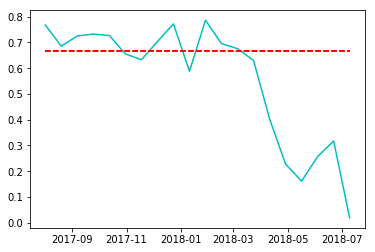

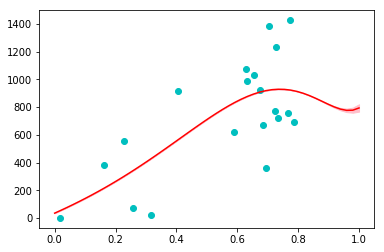

                     dingdan_num  budan_num  budan_rate
ADD_TIME                                               
2018-01-28 17:21:58          879      691.0    0.786121
66.57%


In [34]:
import matplotlib.pyplot as plt
for i in range(18,19):
    x=df_dingdan_time.merge(df_budan,left_on='LID',right_on='ORG_LID',how='left').drop_duplicates('TID_x').fillna(0).eval('dingdan_num=1').groupby([pd.Grouper(key="ADD_TIME",freq='{}d'.format(i))])["dingdan_num","budan_num"].sum().eval('budan_rate=budan_num/dingdan_num').query('budan_rate!=1.0')
    y=x['budan_rate']
    plt.plot(x.index,y,'c')
    plt.plot(x.index,x*0+y.median(), 'r--')
    z={}
    z[0],z[1]=x['budan_num'],x['budan_rate']
    my_bayes(pd.DataFrame(z))
    print(x.query('budan_rate==budan_rate.max()'))
    print('{:.2%}'.format(y.median()))